## 1. Independent Trials + Trial Size

### 1.1 Just do one big experiment


#### In the first exercise we perform one experiment ($X = 1$) with $P = 10000$ Pairs of uniformly-distributed random numbers.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n_exp = 1
n_point = 10000
low = -1.0
high = 1.0
# Production of random pairs in the range [-1, 1]
points = np.random.uniform(low, high, size=(2, n_point, n_exp))

radius = np.sqrt((points**2).sum(axis=0))

in_circ = radius <= 1
out_circ = radius > 1

pi = 4 * in_circ.sum(axis=0)/(in_circ.sum(axis=0) + out_circ.sum(axis=0))

mean = pi.mean()
std = pi.std()

print(f'π = {mean} ± {std}')

π = 3.1452 ± 0.0


We can see that the standart deviation is 0.

##### Plot a histogram of all the radii $r_p = \sqrt{x_p^2 + y_p^2}$ for each pair $p$.

Text(0.5, 1.0, 'Probability distribution of the radii')

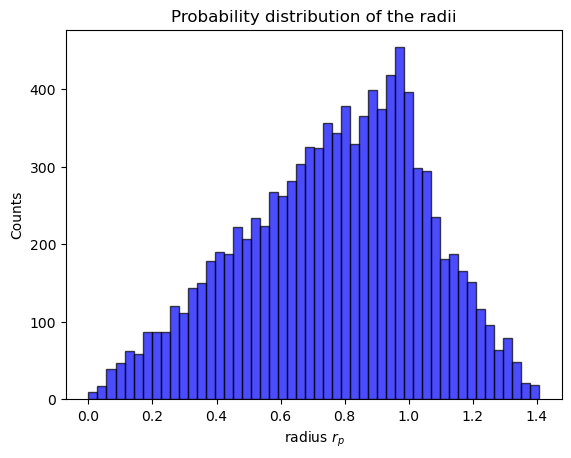

In [3]:
bins = 50
plt.hist(radius, bins=bins, color='b', alpha=0.7, edgecolor='black')
plt.xlabel(r'radius $r_p$')
plt.ylabel('Counts')
plt.title('Probability distribution of the radii')

##### Plot a histogram of all the radii $r_p^2 = \sqrt{x_p^2 + y_p^2}$ for each pair $p$.

Text(0.5, 1.0, 'Probability distribution of the squared radii ')

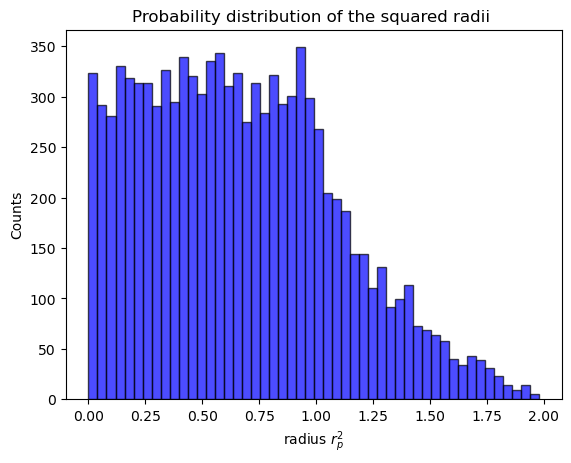

In [4]:
bins = 50
plt.hist(radius**2, bins=bins, color='b', alpha=0.7, edgecolor='black')
plt.xlabel(r'radius $r_p^2$')
plt.ylabel('Counts')
plt.title('Probability distribution of the squared radii ')

From the previous plots, it is evident that the distribution of radii and squared radii is not uniform. For $r_p < 1$, the counts increase as $r_p$ approaches 1. This occurs because, as the radius of the circle increases, the area of the circle grows with the square of the radius, $A = \pi r^2$, resulting in more points being contained within the circle.

Once $r_p$ exceeds 1, the counts begin to decrease. This decline can be attributed to the fact that points lying outside the circle are excluded from our distribution due to the rectangular boundary we are sampling within.

For squared radii, $r_p^2 < 1$ shows a uniform distribution. This uniformity arises because the area’s dependence on the square of the radius is effectively counterbalanced by the quadratic nature of $r_p^2$. After $r_p^2 = 1$, the decrease in counts mirrors the behavior observed for the radii $r_p$, where points outside the circle do not contribute to the distribution.


##### Plot a histogram of the indicator variable $4[x^2 + y^2 \leq 1]$. Draw a vertical line at the mean of all the samples, and indicate the mean $\pm$ standard deviation with vertical lines. Indicate the true, known value of $\pi$ for comparison.


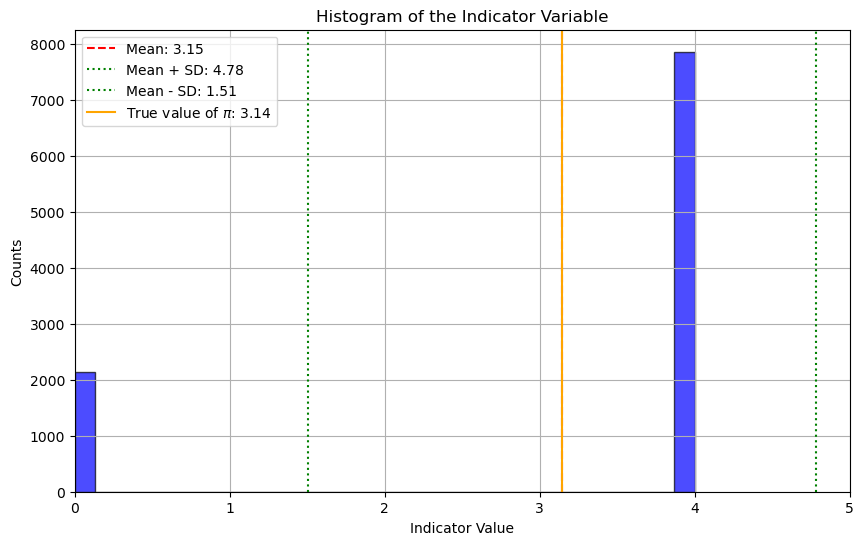

In [5]:
# Calculate the indicator variable 4[x^2 + y^2 ≤ 1]
indicator = 4 * in_circ.astype(int)

# Calculate the mean and standard deviation of the indicator variable
mean_indicator = np.mean(indicator)
std_indicator = np.std(indicator)

# Plot the histogram of the indicator variable
plt.figure(figsize=(10, 6))
plt.hist(indicator, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(mean_indicator, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_indicator:.2f}')
plt.axvline(mean_indicator + std_indicator, color='green', linestyle='dotted', linewidth=1.5, label=f'Mean + SD: {mean_indicator + std_indicator:.2f}')
plt.axvline(mean_indicator - std_indicator, color='green', linestyle='dotted', linewidth=1.5, label=f'Mean - SD: {mean_indicator - std_indicator:.2f}')
plt.axvline(np.pi, color='orange', linestyle='solid', linewidth=1.5, label=f'True value of $\pi$: {np.pi:.2f}')


plt.title('Histogram of the Indicator Variable')
plt.xlabel('Indicator Value')
plt.ylabel('Counts')
plt.legend()
plt.grid()
plt.xlim(0, 5)
plt.show()

Because we have done the experiment only once, the standart deviation is big.

### 1.2  Split into 100 experiments

##### Compute the estimate $\pi_x$ for each experiment $x$. Compute the mean and its uncertainty.


In [6]:
n_exp = 100
n_point = 100
low = -1.0
high = 1.0

points = np.random.uniform(low, high, size=(2, n_point, n_exp))

radius = np.sqrt((points**2).sum(axis=0))

in_circ = radius <= 1
out_circ = radius > 1

pi = 4 * in_circ.sum(axis=0)/(in_circ.sum(axis=0) + out_circ.sum(axis=0))

mean = pi.mean()
std = pi.std()

print(f'π = {mean} ± {std}')

π = 3.116 ± 0.19137397942249096


##### Plot a histogram of the estimates (there should be $X = 100$ numbers that go into your histogram, each one an average of $P = 100$ numbers). Indicate the true known value of $\pi$, and mark the mean, as well as the mean $\pm$ the uncertainty.


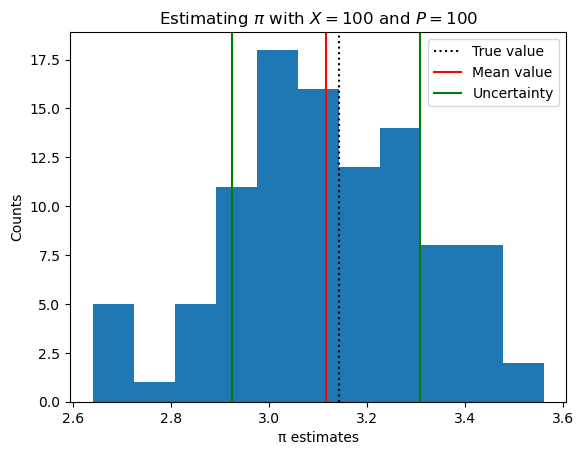

In [7]:
plt.hist(pi, bins=11)  # Use more bins (e.g., 50 bins)
plt.axvline(np.pi, color='black', zorder=1, linestyle=':', label='True value')
plt.axvline(mean, color='red', zorder=1, linestyle='-', label='Mean value')
plt.axvline(mean-std, color='green', zorder=1, linestyle='-', label='Uncertainty')
plt.axvline(mean+std, color='green', zorder=1, linestyle='-')
plt.legend()
plt.xlabel('π estimates')
plt.ylabel('Counts')
plt.title('Estimating $\pi$ with $X = 100$ and $P = 100$')
plt.show()


### 1.3  A Zillion Little Experiments

##### What do we get if we try P = 1 and X = 10000? 

In [8]:
n_exp = 10000
n_point = 1
low = -1.0
high = 1.0

points = np.random.uniform(low, high, size=(2, n_point, n_exp))

radius = np.sqrt((points**2).sum(axis=0))

in_circ = radius <= 1
out_circ = radius > 1

pi = 4 * in_circ.sum(axis=0)/(in_circ.sum(axis=0) + out_circ.sum(axis=0))

mean = pi.mean()
std = pi.std()

print(f'π = {mean} ± {std}')

π = 3.1352 ± 1.6466089274627416


### Stop and Think

We receive again a value close to the real value of $\pi$, but the standart deviation is again large. The same behaviour we had for switched $P$ and $X$ values. The problem is, if you dont average in between some times the standart deviation takes the fluctuations of the uniform distribution into account. Therefore the standart deviation decreses if you use avergaing in between, but the overall precision to the real value of $\pi$ does not change. 


### 1.5 More Experiments vs. Longer Experiments

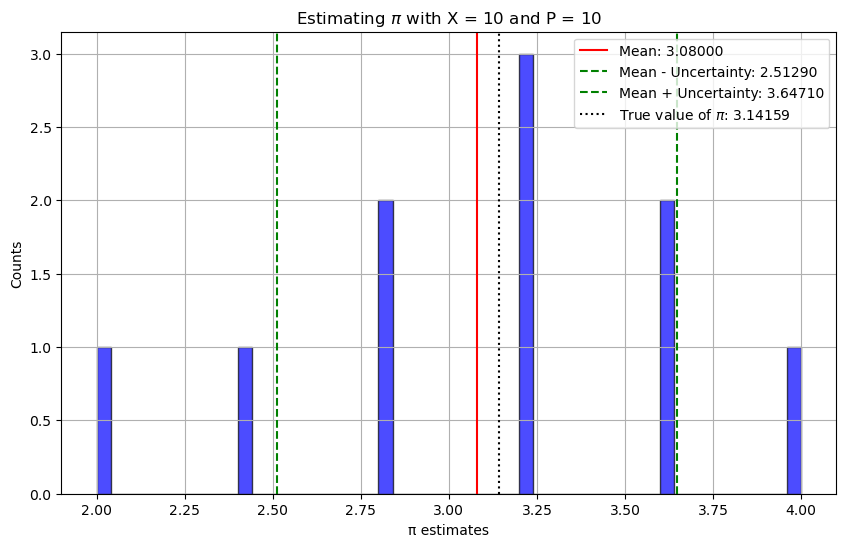

For X = 10, P = 10:
Estimated π = 3.08000 ± 0.56710
--------------------------------------------------


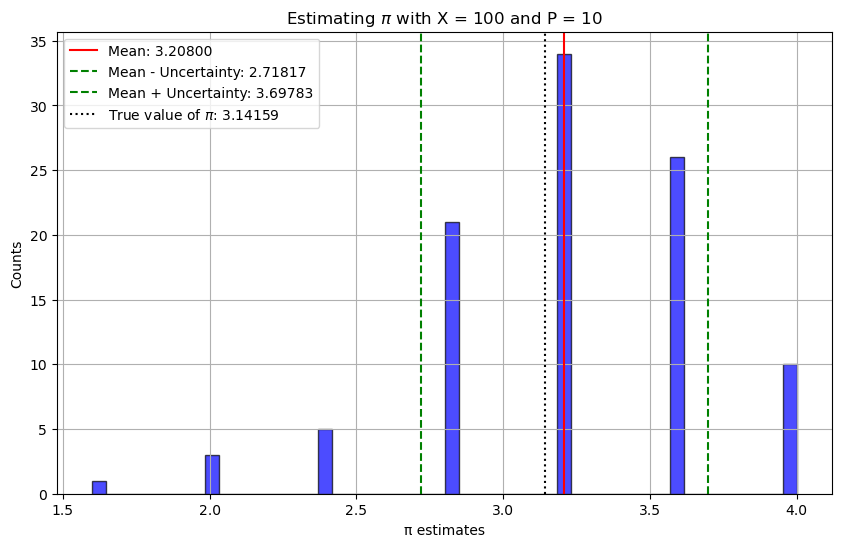

For X = 100, P = 10:
Estimated π = 3.20800 ± 0.48983
--------------------------------------------------


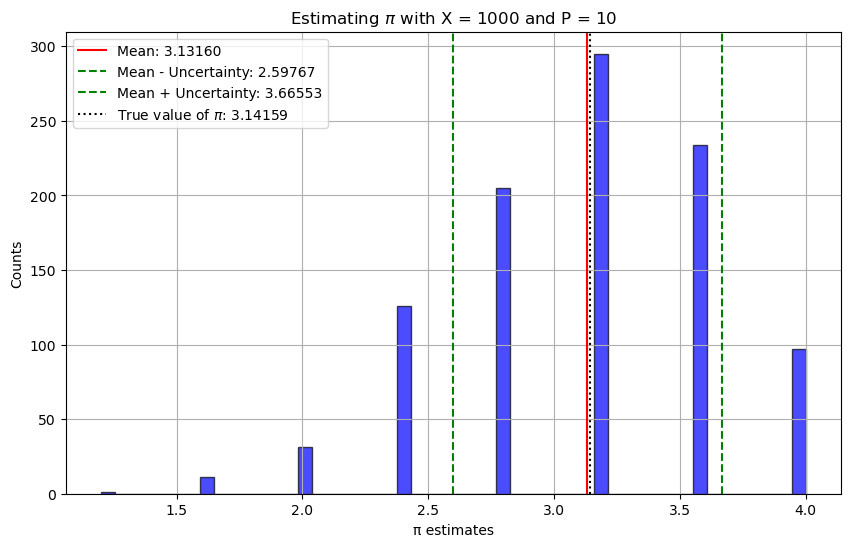

For X = 1000, P = 10:
Estimated π = 3.13160 ± 0.53393
--------------------------------------------------


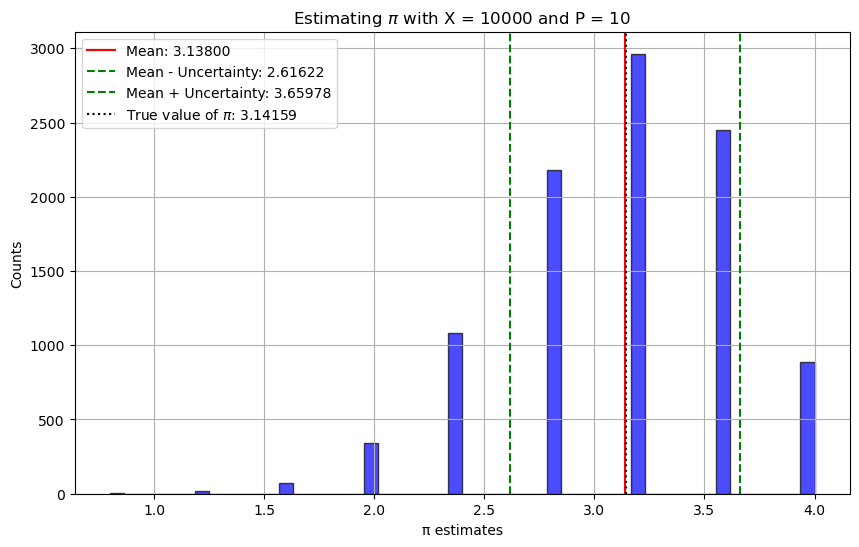

For X = 10000, P = 10:
Estimated π = 3.13800 ± 0.52178
--------------------------------------------------


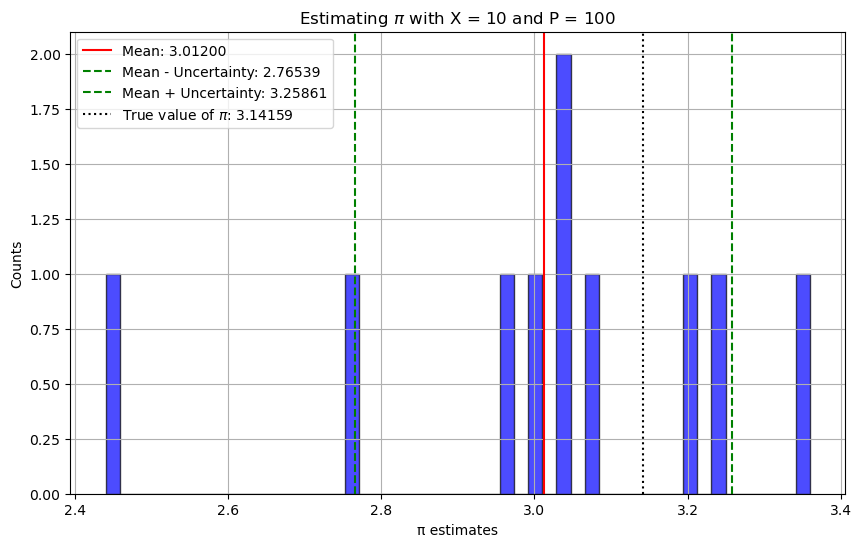

For X = 10, P = 100:
Estimated π = 3.01200 ± 0.24661
--------------------------------------------------


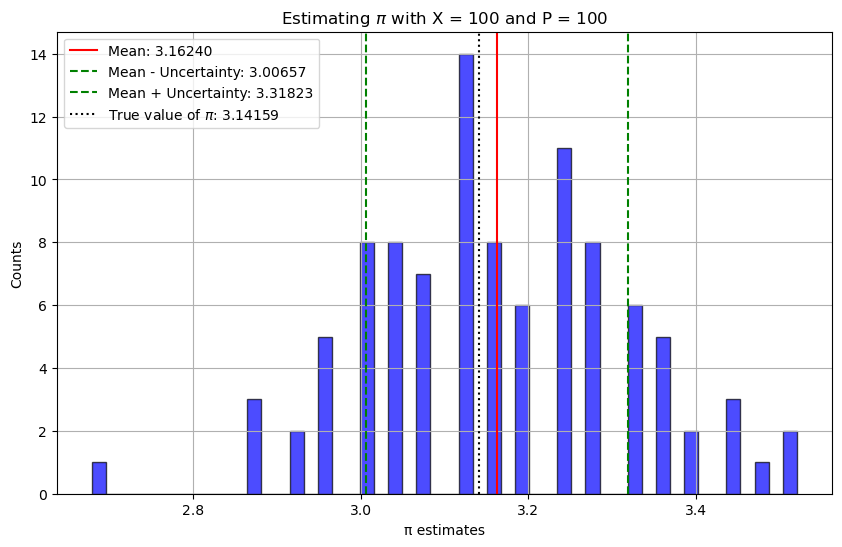

For X = 100, P = 100:
Estimated π = 3.16240 ± 0.15583
--------------------------------------------------


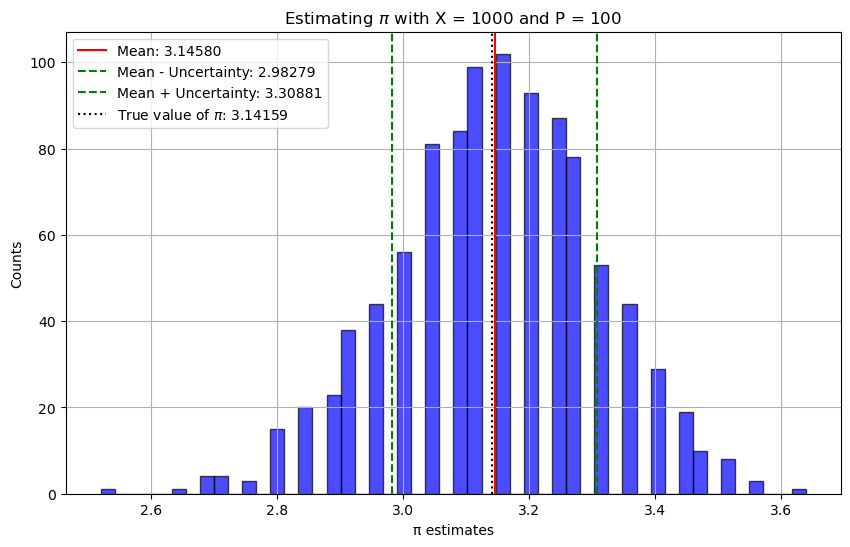

For X = 1000, P = 100:
Estimated π = 3.14580 ± 0.16301
--------------------------------------------------


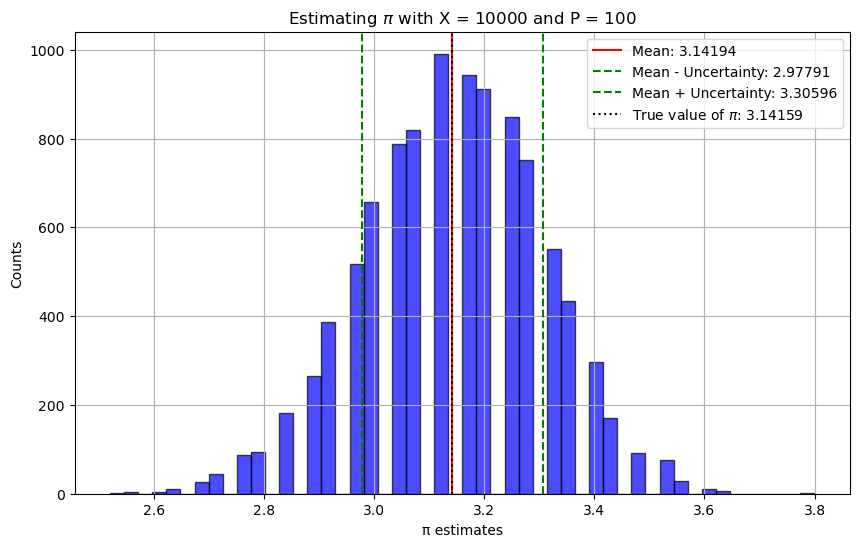

For X = 10000, P = 100:
Estimated π = 3.14194 ± 0.16402
--------------------------------------------------


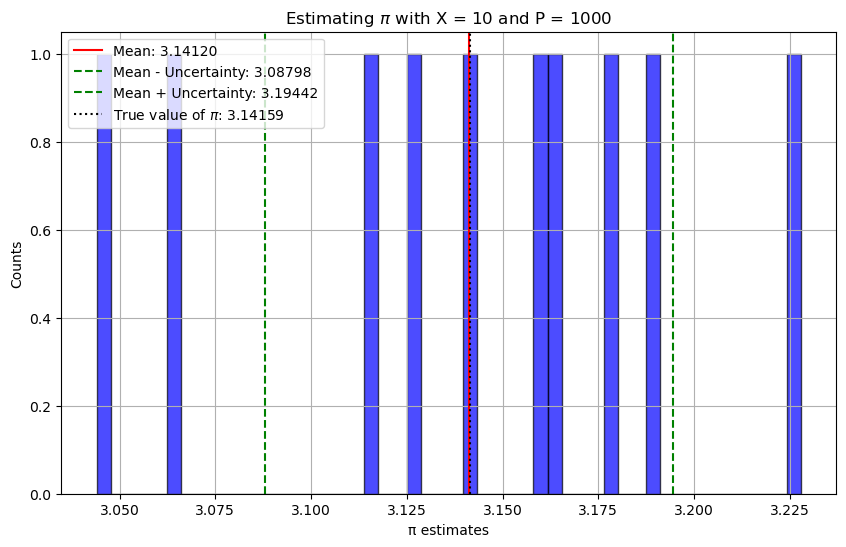

For X = 10, P = 1000:
Estimated π = 3.14120 ± 0.05322
--------------------------------------------------


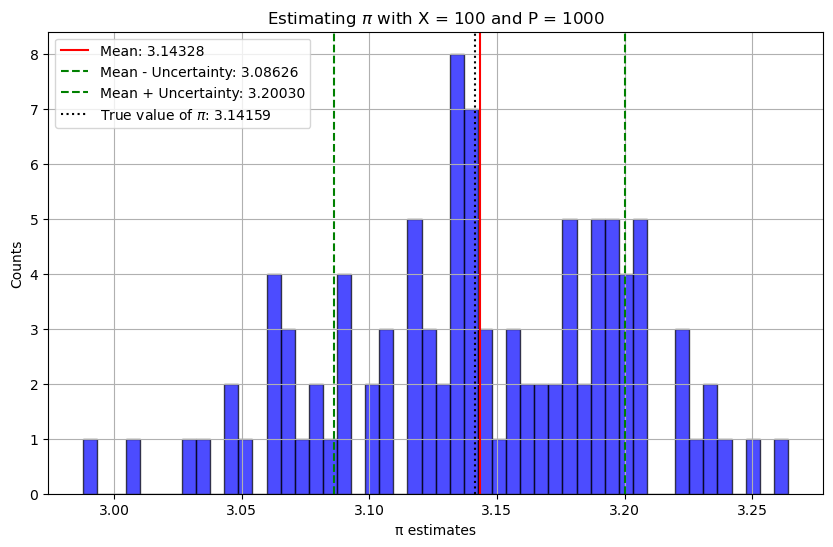

For X = 100, P = 1000:
Estimated π = 3.14328 ± 0.05702
--------------------------------------------------


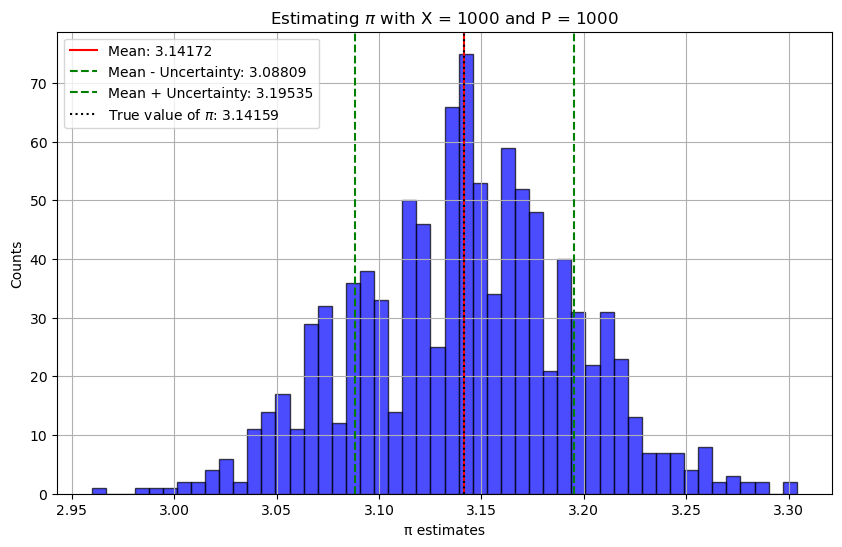

For X = 1000, P = 1000:
Estimated π = 3.14172 ± 0.05363
--------------------------------------------------


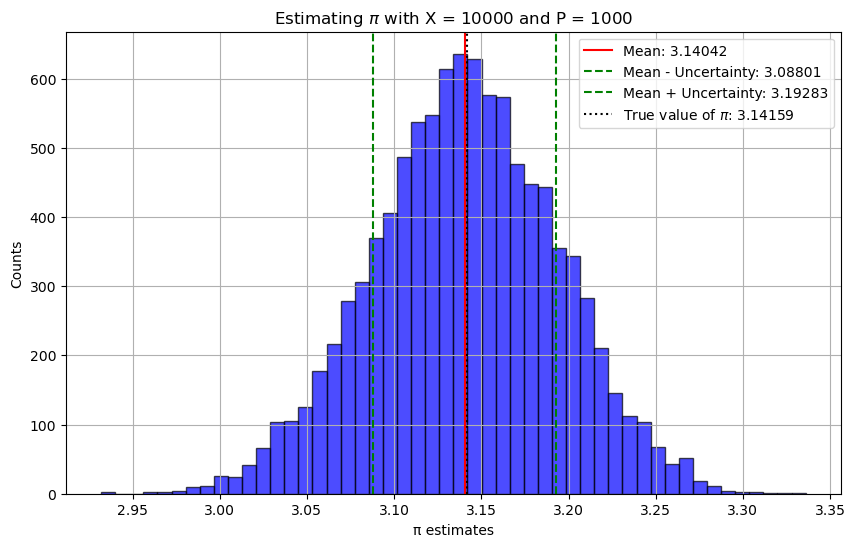

For X = 10000, P = 1000:
Estimated π = 3.14042 ± 0.05241
--------------------------------------------------


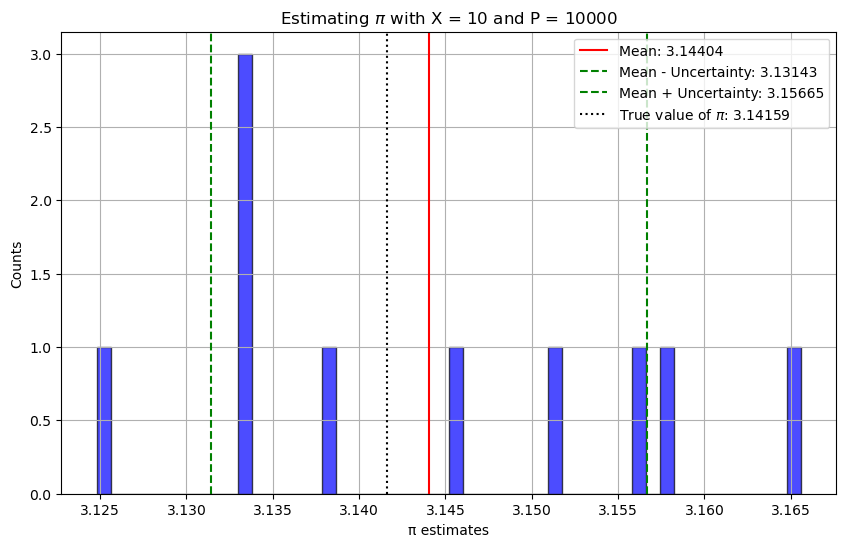

For X = 10, P = 10000:
Estimated π = 3.14404 ± 0.01261
--------------------------------------------------


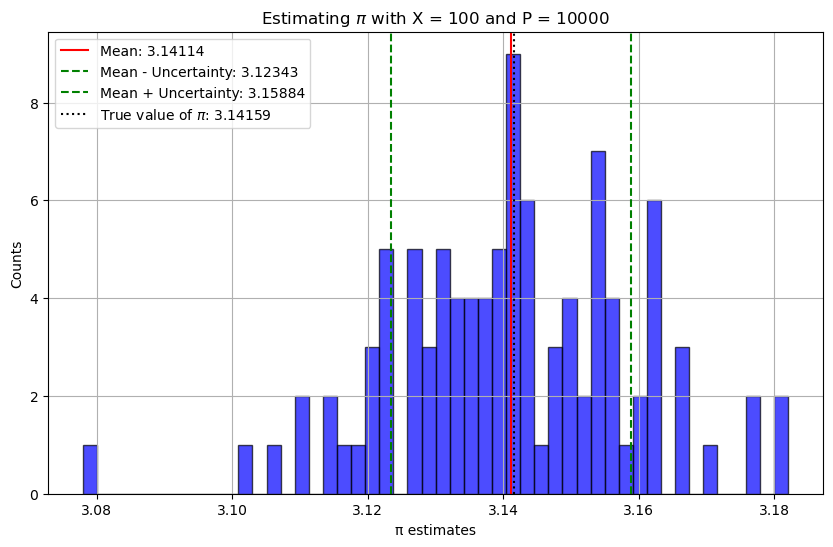

For X = 100, P = 10000:
Estimated π = 3.14114 ± 0.01770
--------------------------------------------------


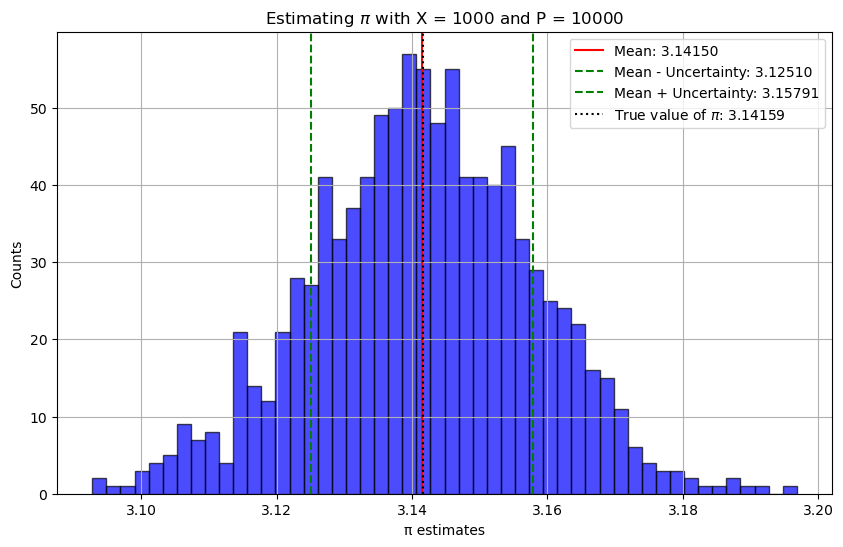

For X = 1000, P = 10000:
Estimated π = 3.14150 ± 0.01640
--------------------------------------------------


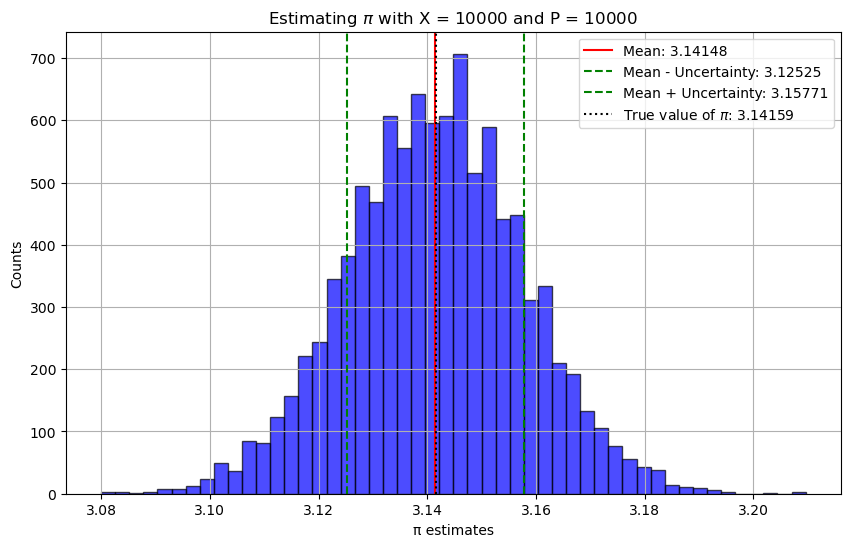

For X = 10000, P = 10000:
Estimated π = 3.14148 ± 0.01623
--------------------------------------------------

If you have a fixed total number of pairs XP = 100000, how should you spend them?

For fixed XP = 100000, if X = 10 and P = 10000:
Estimated π = 3.14648 ± 0.01018
--------------------------------------------------
For fixed XP = 100000, if X = 100 and P = 1000:
Estimated π = 3.15124 ± 0.05017
--------------------------------------------------
For fixed XP = 100000, if X = 1000 and P = 100:
Estimated π = 3.13768 ± 0.16269
--------------------------------------------------
For fixed XP = 100000, if X = 10000 and P = 10:
Estimated π = 3.14312 ± 0.51944
--------------------------------------------------


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Combinations of P and X
P_values = [10, 100, 1000, 10000]
X_values = [10, 100, 1000, 10000]
uncertainties_X = {P: [] for P in P_values}
uncertainties_P = {X: [] for X in X_values}

# Function to run the experiment for a given X and P
def estimate_pi(X, P):
    estimates = []
    for _ in range(X):
        # Generate random points
        points = np.random.uniform(-1, 1, size=(2, P))
        radius = np.sqrt((points**2).sum(axis=0))
        
        # Estimate pi
        in_circle = (radius <= 1)
        pi_estimate = 4 * np.sum(in_circle) / P
        estimates.append(pi_estimate)
    
    # Compute mean and standard deviation
    mean_pi = np.mean(estimates)
    std_pi = np.std(estimates)
    return estimates, mean_pi, std_pi

# First: Collect uncertainties for each combination of X and P
# Loop over all combinations of P and X
for P in P_values:
    for X in X_values:
        # Get the pi estimates, mean, and uncertainty (std)
        estimates, mean_pi, std_pi = estimate_pi(X, P)
        
        # Store uncertainty for plotting (next exercise)
        uncertainties_X[P].append(std_pi)
        uncertainties_P[X].append(std_pi)
        plt.figure(figsize=(10, 6))
        plt.hist(estimates, bins=50, alpha=0.7, color='blue', edgecolor='black')
        plt.axvline(mean_pi, color='red', linestyle='-', label=f'Mean: {mean_pi:.5f}')
        plt.axvline(mean_pi - std_pi, color='green', linestyle='--', label=f'Mean - Uncertainty: {mean_pi - std_pi:.5f}')
        plt.axvline(mean_pi + std_pi, color='green', linestyle='--', label=f'Mean + Uncertainty: {mean_pi + std_pi:.5f}')
        plt.axvline(np.pi, color='black', linestyle=':', label=f'True value of $\pi$: {np.pi:.5f}')
        
        # Add labels and legend
        plt.title(f'Estimating $\pi$ with X = {X} and P = {P}')
        plt.xlabel('π estimates')
        plt.ylabel('Counts')
        plt.legend()
        plt.grid(True)
        plt.show()
        
        # Print the results for each combination
        print(f'For X = {X}, P = {P}:')
        print(f'Estimated π = {mean_pi:.5f} ± {std_pi:.5f}')
        print('-' * 50)

# Analysis of allocation strategy (XP fixed)
total_pairs = 100000  
print(f'\nIf you have a fixed total number of pairs XP = {total_pairs}, how should you spend them?\n')

# Analyze for XP = total_pairs
for X in X_values:
    P = total_pairs // X  # Allocate such that XP is constant
    estimates, mean_pi, std_pi = estimate_pi(X, P)
    
    # Print results for each strategy
    print(f'For fixed XP = {total_pairs}, if X = {X} and P = {P}:')
    print(f'Estimated π = {mean_pi:.5f} ± {std_pi:.5f}')
    print('-' * 50)


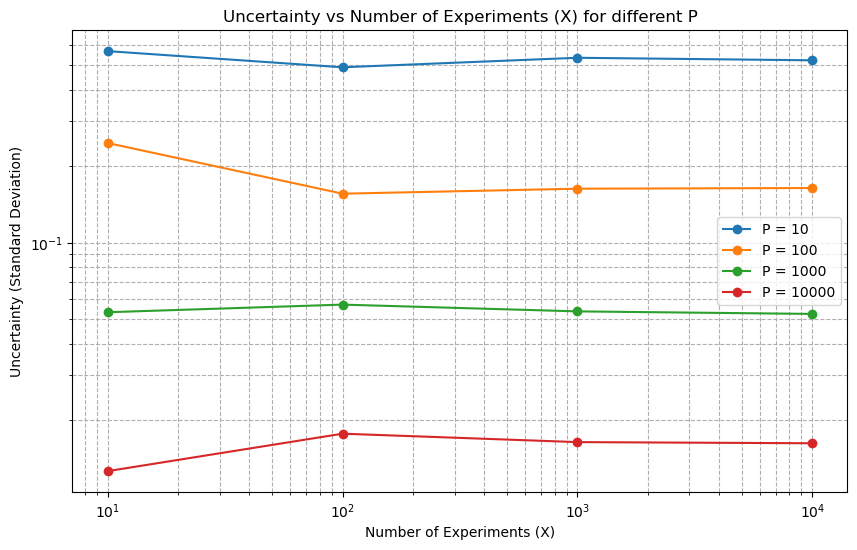

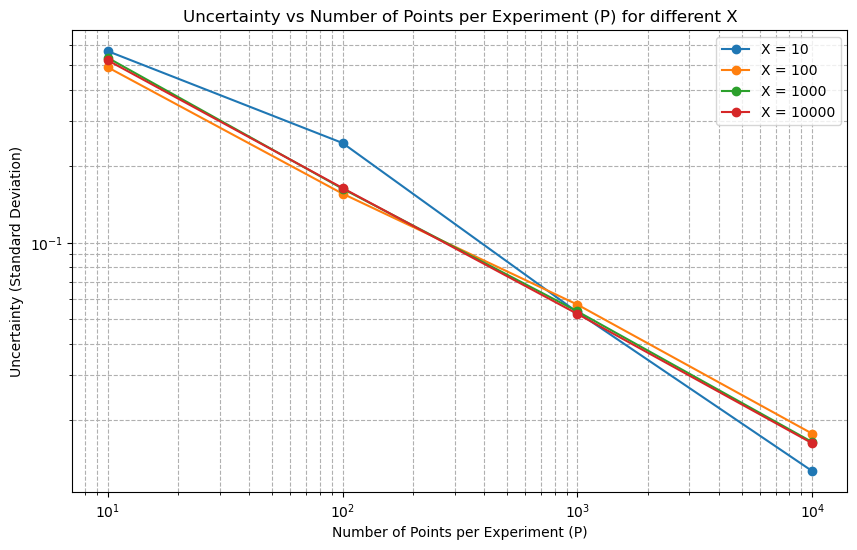

In [10]:
plt.figure(figsize=(10, 6))
for P in P_values:
    plt.loglog(X_values, uncertainties_X[P], marker='o', label=f'P = {P}')
plt.xlabel('Number of Experiments (X)')
plt.ylabel('Uncertainty (Standard Deviation)')
plt.title('Uncertainty vs Number of Experiments (X) for different P')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

# Plot 2: Uncertainty vs P for each X (log-log plot)
plt.figure(figsize=(10, 6))
for X in X_values:
    plt.loglog(P_values, uncertainties_P[X], marker='o', label=f'X = {X}')
plt.xlabel('Number of Points per Experiment (P)')
plt.ylabel('Uncertainty (Standard Deviation)')
plt.title('Uncertainty vs Number of Points per Experiment (P) for different X')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()


We observe that the number of experiments $X$ does not change the uncertainty of the estimation, but the number of pairs decreases the uncertainty significantly. The Probmel is if we do use only a few experiments the reult will be unprecise, so we have to find a good mix between the number of pairs and the number of experiments. Due to the results I would suggest $P=1000$ and $X=100$. 